# Census Income
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv('files/datasets/adult.csv')
raw_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
raw_df.replace(to_replace='?', value=np.nan, inplace=True)

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


---

In [22]:
def xy_split(dataframe, y_column):
    features = dataframe.loc[:, dataframe.columns != y_column]
    target = dataframe[y_column]
    return features, target

X, y = xy_split(raw_df, 'income')

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
df = raw_df.copy()

In [56]:
def ohe_eligibility(datafame):
    for i in datafame.columns:
        if len(datafame[i].value_counts()) < 10:
            print(f'{i}: {len(datafame[i].value_counts())}')
            # print(f'{dataframe.columns}')
        else:
            pass
        
ohe_eligibility(df)

workclass: 8
marital.status: 7
relationship: 6
race: 5
sex: 2
income: 2


---

In [43]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [50]:
from sklearn.preprocessing import OneHotEncoder



In [7]:
raw_df['native.country'].value_counts(dropna=False)

United-States                 29170
Mexico                          643
NaN                             583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [8]:
raw_df['marital.status'].value_counts(dropna=False)

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

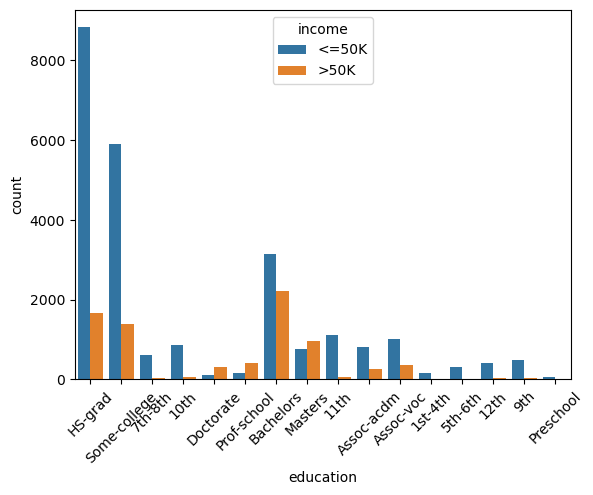

In [9]:
plot_params = {'data':   raw_df,
               'x':      'education',
               'sep_by': 'income'}

def countplot(data, x, sep_by):
    sns.countplot(data = data, x = x, hue = sep_by)
    plt.xticks(rotation=45)
    return plt.show()

countplot(**plot_params)

In [34]:
for i in df.columns:
    if len(df[i].value_counts()) < 10:
        print(f'{i}: {len(df[i].value_counts())}')
    else:
        pass

workclass: 8
marital.status: 7
relationship: 6
race: 5
sex: 2
income: 2


In [27]:
for i in raw_df.columns:
    print(f'{i}: {len(raw_df[i].value_counts())}')

age: 73
workclass: 8
fnlwgt: 21648
education: 16
education.num: 16
marital.status: 7
occupation: 14
relationship: 6
race: 5
sex: 2
capital.gain: 119
capital.loss: 92
hours.per.week: 94
native.country: 41
income: 2


In [10]:
for i in raw_df.columns:
    print(f'{i}: {raw_df[i].isnull().sum()}')

age: 0
workclass: 1836
fnlwgt: 0
education: 0
education.num: 0
marital.status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
capital.gain: 0
capital.loss: 0
hours.per.week: 0
native.country: 583
income: 0


In [69]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


from sklearn import set_config



set_config(transform_output="pandas")

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer




freq_imp = SimpleImputer(strategy="most_frequent")
ohe_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


cat_pipeline = make_pipeline(freq_imp, ohe_enc)




In [71]:
# OneHotEncoding

ohe_cols = 


In [ ]:
'native.country'

In [76]:
process = ColumnTransformer([
    ('cat', cat_pipeline, ['workclass', 'marital.status', 'relationship', 'race', 'sex']),
    ('ohe', ohe_enc, ohe_cols)
])

In [77]:
new_df = process.fit_transform(raw_df)
new_df

,cat__workclass_Federal-gov,cat__workclass_Local-gov,cat__workclass_Never-worked,cat__workclass_Private,cat__workclass_Self-emp-inc,cat__workclass_Self-emp-not-inc,cat__workclass_State-gov,cat__workclass_Without-pay,cat__marital.status_Divorced,cat__marital.status_Married-AF-spouse,...,ohe__relationship_Own-child,ohe__relationship_Unmarried,ohe__relationship_Wife,ohe__race_Amer-Indian-Eskimo,ohe__race_Asian-Pac-Islander,ohe__race_Black,ohe__race_Other,ohe__race_White,ohe__sex_Female,ohe__sex_Male
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
32557,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32558,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
32559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


workclass - replace by mode <br>
occupation - replace using a machine learning method <br>
native.country - replace by mode